In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = "C:/Users/julda/OneDrive/Desktop/Python Exercise/Sales/"
files = [file for file in os.listdir(path)]
tab = pd.DataFrame()

for file in files:
    if 'csv' in file:
        df = pd.read_csv(path+file)    
        tab = pd.concat([tab, df])

In [3]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
tab['Product'].nunique()

20

# Data Cleansing

In [5]:
tab = tab.dropna(how='all') #drop NaN value

In [6]:
ntab = tab['Quantity Ordered'].sort_values()
for n in ntab:
    if n in ('1','2','3','4','5','6','7','8','9'): #Check string column before change columns type
        2
    else:
        print(n) 
        
df = tab[tab['Quantity Ordered']!='Quantity Ordered'] #new table without string in 'Quantity Ordered' columns

Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Ordered
Quantity Order

# Change Column Type

In [7]:
df['Quantity Ordered'] = df["Quantity Ordered"].astype(int)
df['Price Each'] = df['Price Each'].astype(float) 
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\julda\AppData\Local\Temp/ipykernel_3040/1200192925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df["Quantity Ordered"].astype(int)
C:\Users\julda\AppData\Local\Temp/ipykernel_3040/1200192925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype(float)
C:\Users\julda\AppData\Local\Temp/ipykernel_3040/1200192925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [8]:
df = df.sort_values(['Order ID'])
df = df.reset_index(drop = True)

# Make Total Sales

In [9]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

## For Check

In [10]:
df.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Sales                   54
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 9.2+ MB


In [34]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98


# How are sales per month

#### Find the best month to make some promo

In [73]:
df_m = df
df_m['Month'] = df_m['Order Date'].dt.month

In [50]:
pm = df_m.pivot_table(index=['Product'], columns=['Month'], values=['Sales'], aggfunc=np.sum)
pm

Sales                                   \
Month                              1          2          3          4    
Product                                                                  
20in Monitor                 23977.82   27057.54   35856.74   43226.07   
27in 4K Gaming Monitor      122066.87  166525.73  186805.21  220734.34   
27in FHD Monitor             63295.78   71245.25   91193.92  110392.64   
34in Ultrawide Monitor      119316.86  158835.82  198354.78  248513.46   
AA Batteries (4-pack)         5468.16    6662.40    8509.44   10832.64   
AAA Batteries (4-pack)        4784.00    5896.28    7412.21    8787.61   
Apple Airpods Headphones    122700.00  151800.00  198300.00  227850.00   
Bose SoundSport Headphones   66193.38   84091.59  119788.02  128687.13   
Flatscreen TV                73200.00   93900.00  108600.00  138000.00   
Google Phone                191400.00  228600.00  277800.00  348000.00   
LG Dryer                     23400.00   22800.00   29400.00   46800.00   
LG Washing Machine           25200.00   24000.00   38400.00   36600.00   
Lightning Charging Cable     17267.25   22410.05   28001.35   35476.35   
Macbook Pro Laptop          399500.00  469200.00  644300.00  771800.00   
ThinkPad Laptop             218997.81  274997.25  344996.55  389996.10   
USB-C Charging Cable         15379.65   19765.30   23230.80   27114.55   
Vareebadd Phone              50400.00   51600.00   69600.00   88000.00   
Wired Headphones             13009.15   15335.21   19951.36   24759.35   
iPhone                      266700.00  307300.00  376600.00  485100.00   

                                                                        \
Month                              5          6          7          8    
Product                                                                  
20in Monitor                 37506.59   35416.78   35966.73   28707.39   
27in 4K Gaming Monitor      211374.58  175885.49  188365.17  171595.60   
27in FHD Monitor            103343.11   85044.33   91043.93   73645.09   
34in Ultrawide Monitor      206714.56  172895.45  175555.38  144396.20   
AA Batteries (4-pack)         9154.56    8048.64    7952.64    7019.52   
AAA Batteries (4-pack)        8751.73    6464.38    7071.35    6042.79   
Apple Airpods Headphones    204750.00  175050.00  183000.00  151350.00   
Bose SoundSport Headphones  117588.24   98290.17  105989.40   88091.19   
Flatscreen TV               119700.00  110100.00  119700.00   99300.00   
Google Phone                288000.00  234600.00  246600.00  216600.00   
LG Dryer                     45600.00   25800.00   33000.00   27600.00   
LG Washing Machine           38400.00   33000.00   31200.00   28800.00   
Lightning Charging Cable     31021.25   25220.65   27074.45   21572.85   
Macbook Pro Laptop          790500.00  605200.00  625600.00  508300.00   
ThinkPad Laptop             370996.29  313996.86  318996.81  273997.26   
USB-C Charging Cable         24712.60   20016.25   22095.55   17470.90   
Vareebadd Phone              74000.00   62000.00   58400.00   57200.00   
Wired Headphones             22493.24   17673.26   18764.35   15479.09   
iPhone                      448000.00  373100.00  351400.00  307300.00   

                                                                         
Month                              9          10         11          12  
Product                                                                  
20in Monitor                 30467.23   47185.71   46195.80    62584.31  
27in 4K Gaming Monitor      148586.19  281962.77  224244.25   336951.36  
27in FHD Monitor             72445.17  118642.09  107842.81   144290.38  
34in Ultrawide Monitor      144016.21  254973.29  209374.49   322611.51  
AA Batteries (4-pack)         6800.64   11289.60   10080.00    14300.16  
AAA Batteries (4-pack)        5749.77   10055.37    9044.75    12680.59  
Apple Airpods Headphones    145350.00  250650.00  226950.00   311400.00  
Bose SoundSport Headphones   82791

In [53]:
xm = []
for x in pm.index:
    xm.append(x)

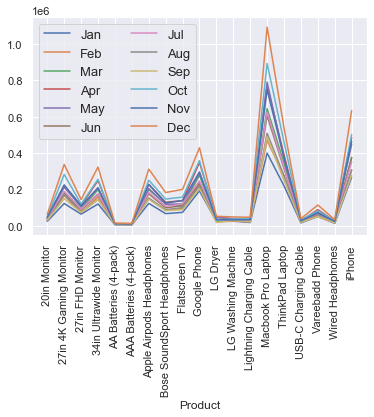

In [68]:
fm = pm.plot()
fm.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc='upper left', fontsize=13, ncol=2)
plt.xticks(ticks=range(19), labels=xm, rotation = 90);

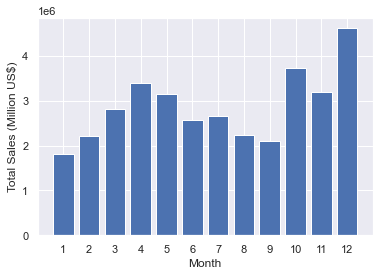

In [72]:
m = df['Order Date'].dt.month
s = df.groupby(m)['Sales'].sum()


plt.bar(range(1,13), s)
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Total Sales (Million US$)');

# Sales For Every Product

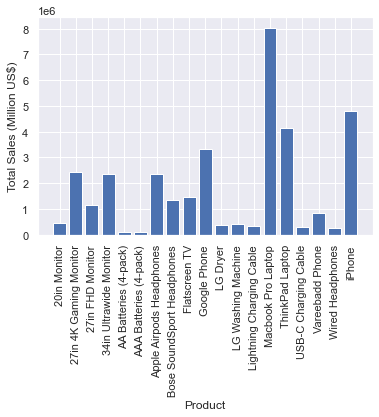

In [48]:
p = df.groupby('Product')['Sales'].sum()


plt.bar(range(19), p);
plt.xticks(range(19), labels = xt, rotation=90);
plt.xlabel('Product');
plt.ylabel('Total Sales (Million US$)');

# Time that Purchase Made

#### Find out the best time to promote product

In [13]:
df_h = df[['Order ID', 'Order Date']]
df_h['Order Date'] = df_h['Order Date'].dt.hour
df_h = df_h.drop_duplicates()
df_h

C:\Users\julda\AppData\Local\Temp/ipykernel_3040/1604952469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['Order Date'] = df_h['Order Date'].dt.hour


,Order ID,Order Date
0,141234,21
1,141235,14
2,141236,13
3,141237,20
4,141238,11
...,...,...
185945,319666,20
185946,319667,12
185947,319668,6
185948,319669,10


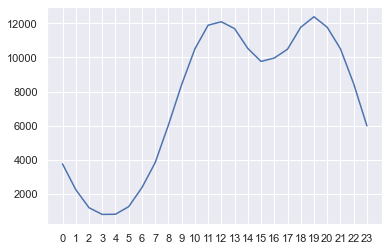

In [32]:
hour = df_h.groupby('Order Date')['Order ID'].count()
plt.plot(range(24), hour)
plt.xticks(range(24));

# Find Out Possible Future Bundle

In [74]:
df_s = df[['Order ID', 'Product', 'Quantity Ordered', 'Order Date', 'Purchase Address', 'Sales']]

In [16]:
df_s['City'] = df_s['Purchase Address'].apply(lambda x : x.split(',')[1])
df_s = df_s[['Order ID', 'Product', 'Quantity Ordered', 'Order Date', 'City']]
df_s = df_s.sort_values(['Order ID', 'Product'])
df_s

C:\Users\julda\AppData\Local\Temp/ipykernel_3040/135640551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['City'] = df_s['Purchase Address'].apply(lambda x : x.split(',')[1])


,Order ID,Product,Quantity Ordered,Order Date,City
0,141234,iPhone,1,2019-01-22 21:25:00,Boston
1,141235,Lightning Charging Cable,1,2019-01-28 14:15:00,Portland
2,141236,Wired Headphones,2,2019-01-17 13:33:00,San Francisco
3,141237,27in FHD Monitor,1,2019-01-05 20:33:00,Los Angeles
4,141238,Wired Headphones,1,2019-01-25 11:59:00,Austin
...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,2019-12-11 20:58:00,San Francisco
185946,319667,AA Batteries (4-pack),2,2019-12-01 12:01:00,Los Angeles
185947,319668,Vareebadd Phone,1,2019-12-09 06:43:00,Seattle
185948,319669,Wired Headphones,1,2019-12-03 10:39:00,Dallas


In [17]:
bundle = df_s
bundle['Bundle'] = df_s.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
bundle = bundle[['Order ID', 'Bundle']]
bundle = bundle[bundle['Order ID'].duplicated()]
bundle

,Order ID,Bundle
42,141275,"USB-C Charging Cable,Wired Headphones"
58,141290,"AA Batteries (4-pack),Apple Airpods Headphones"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Bose SoundSport Headphones,Google Phone"
...,...,...
185811,319536,"Macbook Pro Laptop,Wired Headphones"
185832,319556,"Google Phone,Wired Headphones"
185860,319584,"Wired Headphones,iPhone"
185873,319596,"Lightning Charging Cable,iPhone"


In [76]:
bundle = bundle.groupby('Bundle').agg({'Order ID' : 'count'})
bundle = bundle.sort_values('Order ID', ascending = False)
bundle.head(10)

,Order ID
Bundle,
"Lightning Charging Cable,iPhone",891
"Google Phone,USB-C Charging Cable",868
"Wired Headphones,iPhone",374
"USB-C Charging Cable,Vareebadd Phone",318
"Google Phone,Wired Headphones",311
"Apple Airpods Headphones,iPhone",299
"Bose SoundSport Headphones,Google Phone",169
"Google Phone,USB-C Charging Cable,Wired Headphones",156
"Lightning Charging Cable,Wired Headphones,iPhone",114


# Data For City

In [19]:
df_s['City'].nunique()

9

In [20]:
pc = df_s.pivot_table(index=['Product'], columns=['City'], values=['Quantity Ordered'], aggfunc=np.sum)
pc

Quantity Ordered                          \
City                                Atlanta  Austin  Boston  Dallas   
Product                                                               
20in Monitor                            342     230     394     343   
27in 4K Gaming Monitor                  493     318     675     481   
27in FHD Monitor                        588     360     797     587   
34in Ultrawide Monitor                  482     328     671     512   
AA Batteries (4-pack)                  2193    1424    3016    2261   
AAA Batteries (4-pack)                 2359    1668    3461    2504   
Apple Airpods Headphones               1266     887    1653    1194   
Bose SoundSport Headphones             1084     707    1416    1063   
Flatscreen TV                           407     242     554     420   
Google Phone                            451     274     593     461   
LG Dryer                                 59      55      59      44   
LG Washing Machine                       52      26      72      51   
Lightning Charging Cable               1879    1307    2491    1864   
Macbook Pro Laptop                      379     251     479     382   
ThinkPad Laptop                         357     210     447     345   
USB-C Charging Cable                   1915    1251    2561    1852   
Vareebadd Phone                         173     108     214     178   
Wired Headphones                       1579    1130    2222    1669   
iPhone                                  544     377     753     519   

                                                                  \
City                        Los Angeles  New York City  Portland   
Product                                                            
20in Monitor                        658            560       278   
27in 4K Gaming Monitor             1003            842       434   
27in FHD Monitor                   1223           1072       530   
34in Ultrawide Monitor              955            868       403   
AA Batteries (4-pack)              4438           3630      1939   
AAA Batteries (4-pack)             4967           4124      2080   
Apple Airpods Headphones           2473           2098      1099   
Bose SoundSport Headphones         2125           1794       889   
Flatscreen TV                       727            628       312   
Google Phone                        848            758       355   
LG Dryer                            116             77        37   
LG Washing Machine                  105             85        37   
Lightning Charging Cable           3772           3041      1531   
Macbook Pro Laptop                  751            657       337   
ThinkPad Laptop                     641            560       274   
USB-C Charging Cable               3782           3269      1582   
Vareebadd Phone                     317            281       124   
Wired Headphones                   3270           2707      1362   
iPhone                             1118            881       450   

                                                    
City                        San Francisco  Seattle  
Product                                             
20in Monitor                         1000      324  
27in 4K Gaming Monitor               1460      538  
27in FHD Monitor                     1814      579  
34in Ultrawide Monitor               1446      534  
AA Batteries (4-pack)                6555     2179  
AAA Batteries (4-pack)               7408     2446  
Apple Airpods Headphones             3733     1258  
Bose SoundSport Headphones           3317     1062  
Flatscreen TV                        1154      375  
Google Phone                         1358      434  
LG Dryer                              143       56  
LG Washing Machine                    180       58  
Lightning Charging Cable             5557     1775  
Macbook Pro Laptop                   1136      356  
ThinkPad Laptop                       963      333  
USB-C Chargin

In [55]:
xt = []
for i in pc.index:
    xt.append(i)

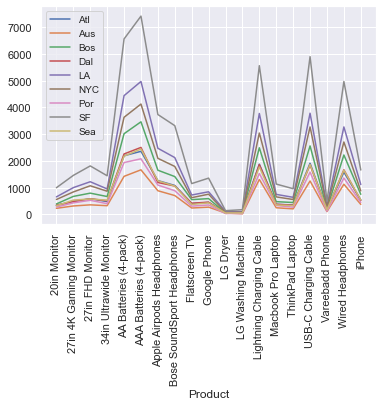

In [83]:
sns.set()
ax = pc.plot()
ax.legend(['Atl','Aus','Bos','Dal','LA','NYC','Por','SF','Sea'], loc='upper left', fontsize=10)
plt.xticks(ticks=range(19), labels = xt, rotation=90);

C:\Users\julda\AppData\Local\Temp/ipykernel_3040/2373149342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Month'] = df_s['Order Date'].dt.month


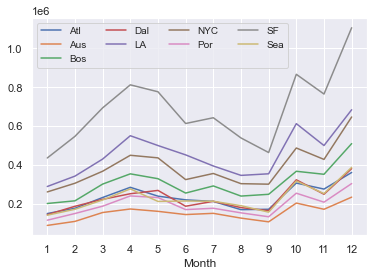

In [82]:
df_s['Month'] = df_s['Order Date'].dt.month
cm = df_m.pivot_table(index=['Month'], columns=['City'], values=['Sales'], aggfunc=np.sum)
citm = cm.plot()
plt.xticks(range(1,13))
citm.legend(['Atl','Aus','Bos','Dal','LA','NYC','Por','SF','Sea'],loc='upper left',fontsize=10,ncol=4);